In [3]:
from pathlib import Path as P
from meterviewer.views.quick import fast_preview
def more_faster(dataset):
    x, y = fast_preview(dataset)

# parent = "/home/svtter/Work/Dataset/MeterData/"
parent = "/home/xiuhao/work/Dataset/MeterData"
data_list = "generated_new", "generated_new_2", "generated_new_3", "generated_new_4", "generated_new_5"

# view generated datasets

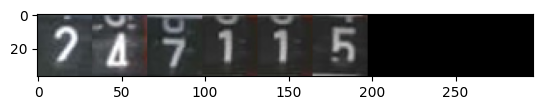

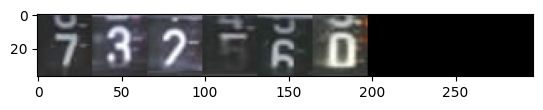

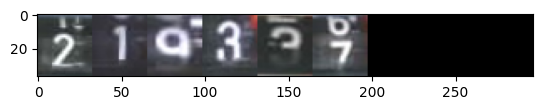

Data written to '/home/xiuhao/work/Dataset/MeterData/generated_new/details.gen.toml' successfully.


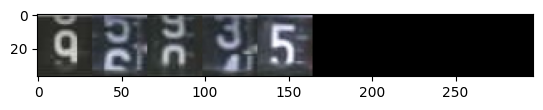

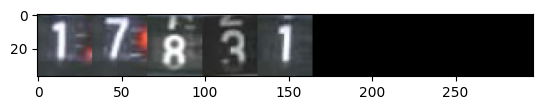

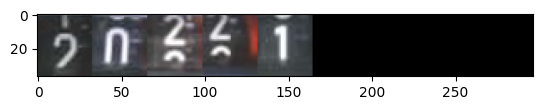

Data written to '/home/xiuhao/work/Dataset/MeterData/generated_new_2/details.gen.toml' successfully.


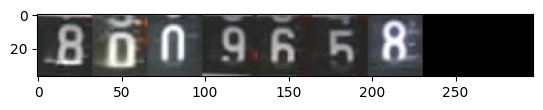

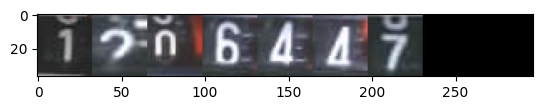

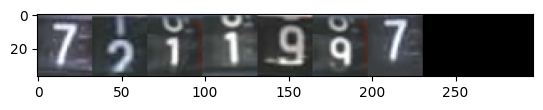

Data written to '/home/xiuhao/work/Dataset/MeterData/generated_new_3/details.gen.toml' successfully.


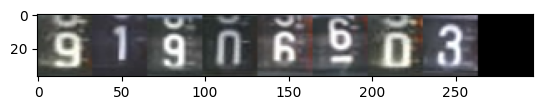

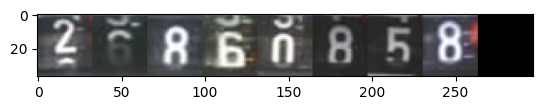

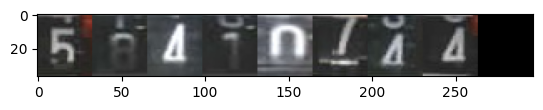

Data written to '/home/xiuhao/work/Dataset/MeterData/generated_new_4/details.gen.toml' successfully.


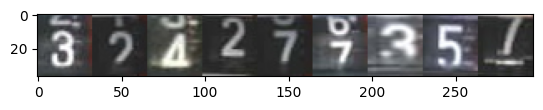

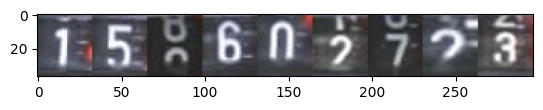

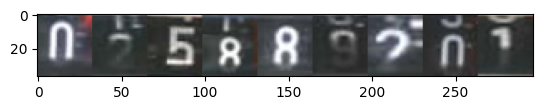

Data written to '/home/xiuhao/work/Dataset/MeterData/generated_new_5/details.gen.toml' successfully.


In [4]:
x_all, y_all = [], []
for name in data_list:
    dataset = P(parent) / name
    x, y = fast_preview(dataset)
    x_all.append(x)
    y_all.append(y)

In [5]:
len(x_all), len(y_all)
# dataset length list: (5, 6, 7, 8, 9)

(5, 5)

In [6]:
x_all[0].shape, x_all[1].shape

((100000, 37, 297, 3), (100000, 37, 297, 3))

In [7]:
import numpy as np

In [8]:
# save current numpy data.
path = P(parent) / 'generated_merged'
path.mkdir(exist_ok=True)
i = 0
for x, y in zip(x_all, y_all):
    np.save(path / f'x_all_{i}.npy', x)
    np.save(path / f'y_all_{i}.npy', y)
    i += 1


# Use h5py to generate large datasets

In [5]:
from pathlib import Path as P
parent = "/home/xiuhao/work/Dataset/MeterData/"
path = P(parent) / 'generated_merged'

In [17]:
import h5py

h5name = 'generated.hdf5'

def open_and_save():
    f = h5py.File(path / 'generated.hdf5', 'w')
    for i in range(5):
        f.create_dataset(f'x_all_{i}', data=x_all[i])
    f.close()

In [18]:
open_and_save()

In [19]:
f = h5py.File(path / h5name, 'r')

In [17]:
data1 = f['x_all_0'][:]

In [18]:
data2 = f['x_all_1'][:]

In [20]:
f.close()

# Use memmap to concat

In [10]:
total_shape =  (100000, 37, 297, 3)

In [11]:
raise Exception("Stop restart to run")

Exception: Stop restart to run

In [3]:
import functools
import numpy as np

In [ ]:
def merge_from_np():
    # Create a memmap to the saved array file
    mmap_list = []
    for i in range(0, 5):
        mmap_array1 = np.memmap(path / f'x_all_{i}.npy', dtype='uint8', mode='r', shape=total_shape)
        mmap_list.append(mmap_array1)

    # Concatenate along the first axis (batch axis)
    merged_array = functools.reduce(lambda x0, x1: np.concatenate((x0, x1), axis=0), mmap_list)

    # Save the merged array to a new memory-mapped file
    mmerged_array = np.memmap(path / 'x_merged.npy', dtype='uint8', mode='w+', shape=merged_array.shape)
    mmerged_array[:] = merged_array[:]

In [1]:
def merge_x():
    x_arr = []
    for i in range(5):
        x_arr.append(np.load(path / f'x_all_{i}.npy'))

    merged = functools.reduce(lambda y0, y1: np.concatenate((y0, y1), axis=0), x_arr)
    np.save(path / 'x_merged.npy', merged)

In [ ]:
# merged y

In [21]:
def merge_y():
    y_arr = []
    for i in range(5):
        y_arr.append(np.load(path / f'y_all_{i}.npy'))

    merged = functools.reduce(lambda y0, y1: np.concatenate((y0, y1), axis=0), y_arr)
    np.save(path / 'y_merged.npy', merged)

In [24]:
merge_y()

In [6]:
merge_x()